In [1]:
import numpy as np
import pickle
from scipy.stats import pearsonr
import sys

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import scripts.outliers as outliers

In [5]:
DATA_FILE = '../data/lda_data_8.pickle'
METADATA_FILE = '../data/metadata.csv'
dataset, ddf, w_dict = outliers.load_data(DATA_FILE, METADATA_FILE)
X_list, Y, Yaudio = dataset
X = np.concatenate(X_list, axis=1)

Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago


In [6]:
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
df_global.head()

,Country,Outliers,N_Country,N_Outliers
0,Canada,0.050000,100,5
1,Lithuania,0.000000,47,0
2,Cambodia,0.210526,19,4
3,Ethiopia,0.257143,35,9
4,Swaziland,0.163265,98,16


## Pearson correlation between percentage of outliers and number of samples per country

correlation -0.0102335874359
p-value 0.905523601988


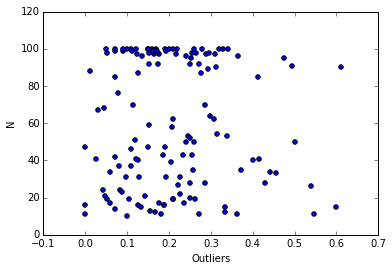

In [10]:
corr, pval = pearsonr(df_global['Outliers'], df_global['N_Country'])
print 'correlation', corr
print 'p-value', pval

plt.scatter(df_global['Outliers'], df_global['N_Country'])
plt.xlabel('Outliers');
plt.ylabel('N');